**Równania różniczkowe zwyczajne**

In [258]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

**Zadanie 2.**

In [259]:
# Numerical stability amplification factor functions (Q = λ*h)
explicit_euler_amp_factor = lambda Q: 1 + Q
implicit_euler_amp_factor = lambda Q: 1/(1-Q)
trapezoidal_amp_factor = lambda Q: (1 + 0.5*Q)/(1 - 0.5*Q)
modified_euler_amp_factor = lambda Q: 1 + Q + 0.5*Q**2
RK4_amp_factor = lambda Q: 1 + Q + 0.5*Q**2 + 1/6*Q**3 + 1/24*Q**4

lambd = -5
h = 0.5
Q = lambd*h
print(explicit_euler_amp_factor(Q), implicit_euler_amp_factor(Q), trapezoidal_amp_factor(Q), 
      modified_euler_amp_factor(Q), RK4_amp_factor(Q))

-1.5 0.2857142857142857 -0.1111111111111111 1.625 0.6484375


For t=0.5, y=-1.5


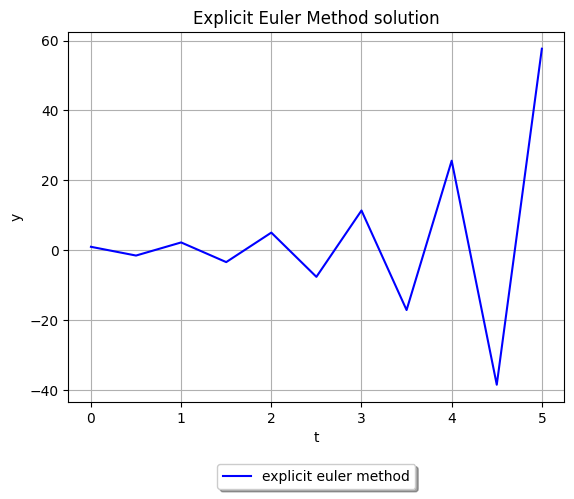

In [260]:
n = 10

# Explicit Euler Method
args = []
values = []
t = 0
y = 1
args.append(t)
values.append(y)
for i in range(n):
    t += h
    y = y + h*lambd*y
    args.append(t)
    values.append(y)

print(f"For t={args[1]}, y={values[1]}")

# Plot
plt.title("Explicit Euler Method solution")
plt.plot(args, values, color='blue', label='explicit euler method')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

For t=0.5, y=0.2857142857142857


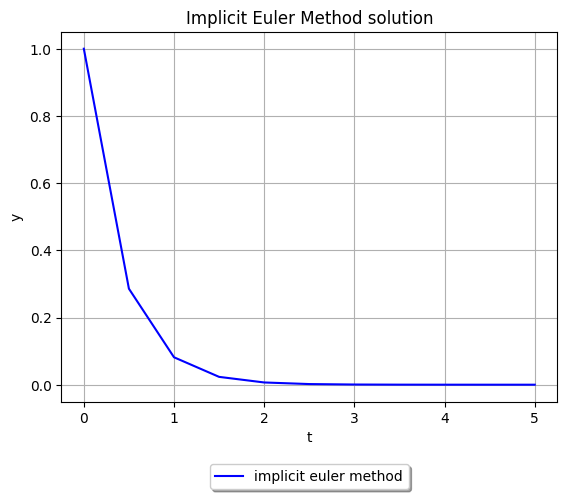

In [261]:
n = 10

# Implicit Euler Method
args = []
values = []
t = 0
y = 1
args.append(t)
values.append(y)
for i in range(n):
    t += h
    y = y/(1-lambd*h)
    args.append(t)
    values.append(y)

print(f"For t={args[1]}, y={values[1]}")

# Plot
plt.title("Implicit Euler Method solution")
plt.plot(args, values, color='blue', label='implicit euler method')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

**Zadanie 3.**

In [262]:
# Data
S_0 = 762
I_0 = 1
R_0 = 0

N = S_0 + I_0 + R_0
beta = 1
gamma = 1/7

h = 0.2
t_range = np.array([h*i for i in range(71)])
all_values = {}

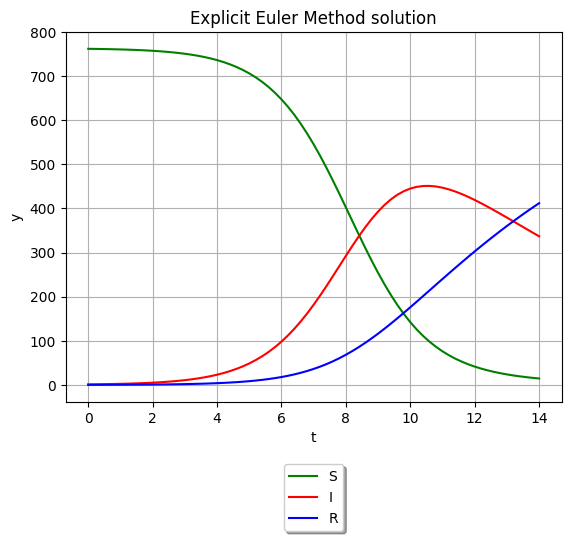

In [263]:
# Initial values
S_values = [S_0]
I_values = [I_0]
R_values = [R_0]
S, I, R = S_0, I_0, R_0

# Explicit Euler Method
for t in t_range:
    if t==0: continue
    R_old = R
    S_old = S
    I_old = I
    R = R_old + h*gamma*I_old
    S = S_old - h*beta*I_old*S_old/N
    I = I_old + h*beta*I_old*S_old/N - h*gamma*I_old
    S_values.append(S)
    I_values.append(I)
    R_values.append(R)

all_values["EXPL"] = (np.array(S_values), np.array(I_values), np.array(R_values))

# Plot
plt.title("Explicit Euler Method solution")
plt.plot(t_range, S_values, color='green', label='S')
plt.plot(t_range, I_values, color='red', label='I')
plt.plot(t_range, R_values, color='blue', label='R')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

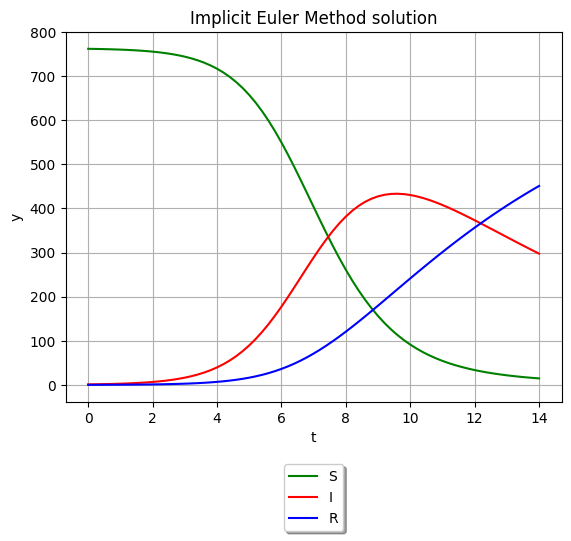

In [264]:
# Initial values
S_values = [S_0]
I_values = [I_0]
R_values = [R_0]
S, I, R = S_0, I_0, R_0

# Implicit Euler Method
def func(x):
    S, I, R = x
    eq_1 = S - S_old + h*beta*I*S/N
    eq_2 = I - I_old - h*beta*I*S/N + h*gamma*I
    eq_3 = R - R_old - h*gamma*I
    return eq_1, eq_2, eq_3


for t in t_range:
    if t==0: continue
    S_old = S
    I_old = I
    R_old = R
    S, I, R = scipy.optimize.fsolve(func, [S_old, I_old, R_old])
    S_values.append(S)
    I_values.append(I)
    R_values.append(R)

all_values["IMPL"] = (np.array(S_values), np.array(I_values), np.array(R_values))

# Plot
plt.title("Implicit Euler Method solution")
plt.plot(t_range, S_values, color='green', label='S')
plt.plot(t_range, I_values, color='red', label='I')
plt.plot(t_range, R_values, color='blue', label='R')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

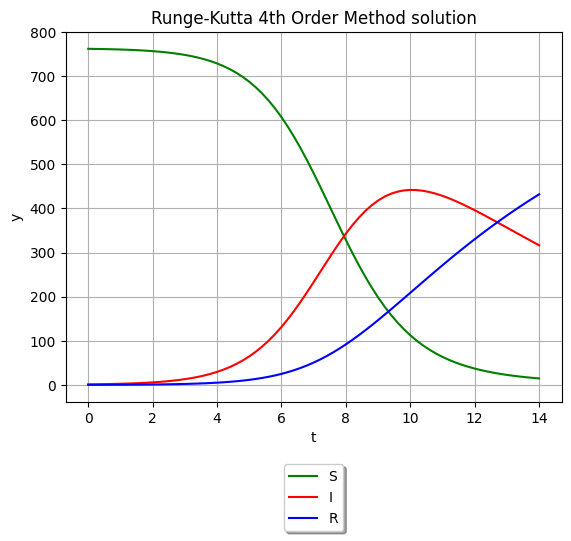

In [265]:
# RK4 Method
def rk4_method(S_0, I_0, R_0, beta, gamma, t_range, h):
    # Initial values
    S_values = [S_0]
    I_values = [I_0]
    R_values = [R_0]
    S, I, R = S_0, I_0, R_0
    N = S_0 + I_0 + R_0

    k1, k2, k3, k4 = {}, {}, {}, {}
    
    for t in t_range:
        if t==0: continue
        S_old = S
        I_old = I
        R_old = R

        # k1
        k1['S'] = -beta*I_old*S_old/N
        k1['I'] = beta*I_old*S_old/N - gamma*I_old
        k1['R'] = gamma*I_old
        
        # k2
        S_temp = S_old + 0.5*h*k1['S']
        I_temp = I_old + 0.5*h*k1['I']
        R_temp = R_old + 0.5*h*k1['R']
        k2['S'] = -beta*I_temp*S_temp/N
        k2['I'] = beta*I_temp*S_temp/N - gamma*I_temp
        k2['R'] = gamma*I_temp
        
        # k3
        S_temp = S_old + 0.5*h*k2['S']
        I_temp = I_old + 0.5*h*k2['I']
        R_temp = R_old + 0.5*h*k2['R']
        k3['S'] = -beta*I_temp*S_temp/N
        k3['I'] = beta*I_temp*S_temp/N - gamma*I_temp
        k3['R'] = gamma*I_temp
        
        # k4
        S_temp = S_old + h*k3['S']
        I_temp = I_old + h*k3['I']
        R_temp = R_old + h*k3['R']
        k4['S'] = -beta*I_temp*S_temp/N
        k4['I'] = beta*I_temp*S_temp/N - gamma*I_temp
        k4['R'] = gamma*I_temp
        
        # Update S, I, R
        S = S_old + h/6*(k1['S'] + 2*k2['S'] + 2*k3['S'] + k4['S'])
        I = I_old + h/6*(k1['I'] + 2*k2['I'] + 2*k3['I'] + k4['I'])
        R = R_old + h/6*(k1['R'] + 2*k2['R'] + 2*k3['R'] + k4['R'])
        
        S_values.append(S)
        I_values.append(I)
        R_values.append(R)
    
    return S_values, I_values, R_values

S_values, I_values, R_values = rk4_method(S_0, I_0, R_0, beta, gamma, t_range, h)

all_values["RK4"] = (np.array(S_values), np.array(I_values), np.array(R_values))

# Plot
plt.title("Runge-Kutta 4th Order Method solution")
plt.plot(t_range, S_values, color='green', label='S')
plt.plot(t_range, I_values, color='red', label='I')
plt.plot(t_range, R_values, color='blue', label='R')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

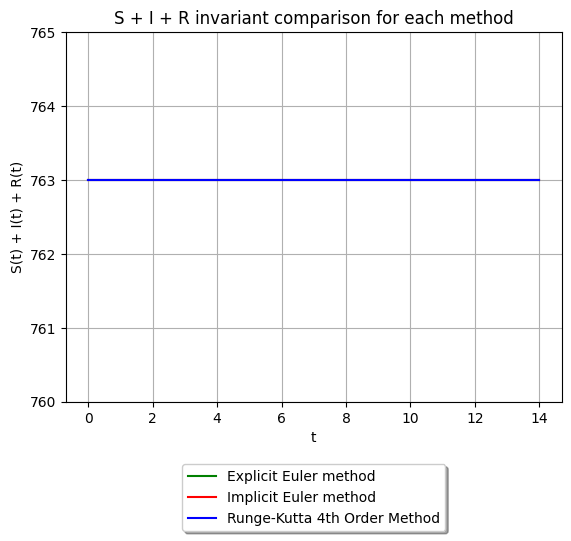

In [266]:
# Invariant
all_values["EXPL"] =all_values["EXPL"][0] + all_values["EXPL"][1] + all_values["EXPL"][2]
all_values["IMPL"] = all_values["IMPL"][0] + all_values["IMPL"][1] + all_values["IMPL"][2]
all_values["RK4"] = all_values["RK4"][0] + all_values["RK4"][1] + all_values["RK4"][2]

# Plot
plt.title("S + I + R invariant comparison for each method")
plt.plot(t_range, all_values["EXPL"], color='green', label='Explicit Euler method')
plt.plot(t_range, all_values["IMPL"], color='red', label='Implicit Euler method')
plt.plot(t_range, all_values["RK4"], color='blue', label='Runge-Kutta 4th Order Method')
plt.xlabel('t')
plt.ylabel('S(t) + I(t) + R(t)')
plt.ylim(760, 765)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

In [267]:
N = 500
days = range(0, 15)
I_observed = [1, 3, 6, 25, 73, 222, 294, 258, 237, 191, 125, 69, 27, 11, 4]

def cost_function_1(args):
    beta, gamma = args
    I_predicted = np.array(rk4_method(N-1, 1, 0, beta, gamma, days, 1)[1])
    return np.sum((I_observed - I_predicted)**2)

def cost_function_2(args):
    beta, gamma = args
    I_predicted = np.array(rk4_method(N-1, 1, 0, beta, gamma, days, 1)[1])
    return -np.sum(I_observed * np.log(I_predicted + 1e-9) - I_predicted)

initial_guess = np.array([0.4, 0.1])
result1 = scipy.optimize.minimize(cost_function_1, initial_guess, method='Nelder-Mead')
result2 = scipy.optimize.minimize(cost_function_2, initial_guess, method='Nelder-Mead')

print(result1['x'], result2['x'])

print(result1['x'][0]/result1['x'][1])
print(result2['x'][0]/result2['x'][1])

# I_1 = np.array(rk4_method(N-1, 1, 0, result1['x'][0], result1['x'][1], days, 1)[1])
# I_2 = np.array(rk4_method(N-1, 1, 0, result2['x'][0], result2['x'][1], days, 1)[1])
# print(I_1)
# print(I_2)


[1.56784756 0.28262516] [1.5828946  0.32904286]
5.547445013084588
4.810603074686487
